0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6


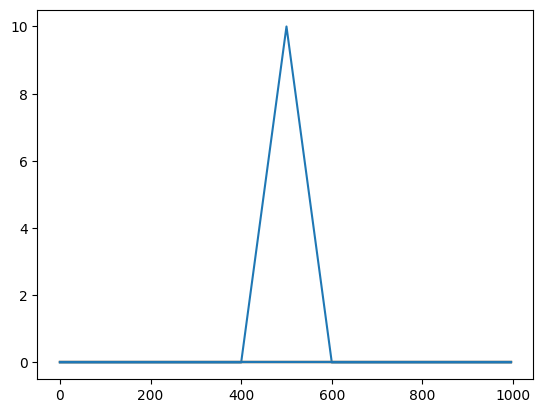

In [83]:
import numpy as np
import matplotlib.pyplot as plt

# function
def funcAdvec(x):
    y = np.zeros(len(x))
    for i in range(0, len(x)):
        if x[i] < 400 or x[i] > 600:
            y[i] = 0
        elif(x[i] < 500):
            y[i] = 0.1*(x[i] - 400)
        else:
            y[i] = 20 - 0.1*(x[i] - 400)
    return y

def linearInterp(a, y1, y2):
    return (1-a)*y1 + (a)*y2
def cubicInterp(a, x1, x2, x3, x4):
    return -a*(1-a**2)  *x1/6   \
        + a*(1+a)*(2-a) *x2/2   \
        + (1-a**2)*(2-a)*x3/2   \
        - a*(1-a)*(2-a) *x4/6

u = 1
dt = 42
dx = 5
x0 = np.arange(0, 1000, dx)
y0 = funcAdvec(x0)
xmax = max(x0)
sz = len(x0)
y1 = np.zeros(sz)
c = u*dt/dx
plt.plot(x0, y0)
t = 0; tpoint = 1000
while t < tpoint:
    t = t + dt
    for j in range(sz):
        xjd = x0[j] - u*dt
        if xjd < 0:
            xjd = xjd + xmax
        m = int(np.floor(xjd/dx))
        # print(xjd, x0[m])
        # a = (xjd/dx)-m
        a = (xjd - x0[m])/dx
        print(a)
        y1[j] = linearInterp(a, y0[m], y0[m+1])
        # y1[j] = cubicInterp(a, y0[m-2], y0[m-1], y0[m-1], y0[m+1])
        # print(xjd, y0[m], m, x0[m], x0[j], a, y0[j], y1[j]) #m and m +1
        # print(xjd, m, x0[j]) #m and m +1
    y0 = y1
    if t%100 < dt:
        plt.plot(x0, y0)
# print(x0)
    



